## Imports

In [14]:
#!pip install kagglehub

In [15]:
%matplotlib inline
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import kagglehub
import shutil

# import download
from random import shuffle
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import EfficientNetV2S,MobileNetV3Large

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Activation, GlobalAveragePooling2D, Flatten

import sys
import h5py

current_dir = os.getcwd()
print(current_dir)
sys.path.append(current_dir+'/utils')
from utils.datamanager import download_dataset, label_video_names
from utils.imageprocessor import get_frames
from utils.pipeline import create_model, make_files


c:\Users\Cesar\Desktop\maestria\TFM


## Check if gpu enabled

In [16]:
# Check if TensorFlow can see a GPU
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
print("GPU Details:", gpus)

Num GPUs Available: 1
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Download dataset

In [17]:
current_dir = os.getcwd()

download_dataset(current_dir)

Dataset copied to: c:\Users\Cesar\Desktop\maestria\TFM


## Load Data

Firstly, we define the directory to place the video dataset

In [18]:
in_dir = "data"

Copy some of the data-dimensions for convenience.

In [ ]:
# Frame size  
img_size = 224

img_size_touple = (img_size, img_size)

# Number of channels (RGB)
num_channels = 3

img_size_tiplet = (img_size, img_size,num_channels)

# Flat frame size
img_size_flat = img_size * img_size * num_channels

# Number of classes for classification (Violence-No Violence)
num_classes = 2

frames_per_file = 10
_images_per_file = frames_per_file


# Video extension
video_exts = ".avi"

### Plot a video frame to see if data is correct

In [20]:
# First get the names and labels of the whole videos
names, labels = label_video_names(in_dir)

In [21]:
frames = get_frames(in_dir, names[100], img_size, _images_per_file)

Convert back the frames to uint8 pixel format to plot the frame

In [22]:
visible_frame = (frames).astype('uint8')


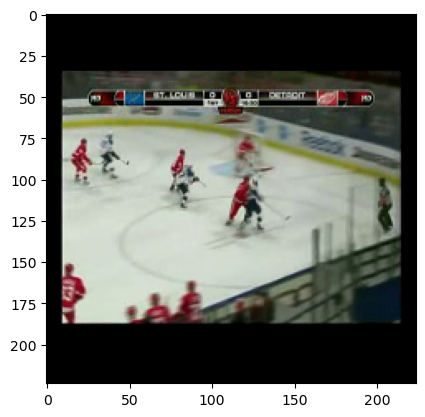

In [23]:
plt.imshow(visible_frame[3])

### Split the dataset into training set and test set
We are going to split the dataset into training set and testing. The training set is used to train the model and the test set to check the model accuracy.

In [24]:
training_set = int(len(names)*0.8)
test_set = int(len(names)*0.2)

names_training = names[0:training_set]
names_test = names[training_set:]

labels_training = labels[0:training_set]
labels_test = labels[training_set:]

## Save processed images per model

Let's see the model summary

In [25]:
models = [EfficientNetB0,ResNet50,EfficientNetV2S,MobileNetV3Large]
for model in models:
    efficientnet_model = create_model(model,img_size_tiplet)
    efficientnet_model.summary()
    training_file = f"./processedData/training/{efficientnet_model.name}.h5"
    testing_file = f"./processedData/testing/{efficientnet_model.name}.h5"
    make_files(training_set,names_training,labels_training,efficientnet_model,training_file,frames_per_file,img_size)
    make_files(training_set,names_training,labels_training,efficientnet_model,testing_file,frames_per_file,img_size)


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     